First few rows of the dataset:
        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...

List of columns in the dataset:
Index(['age', 'Age in years'], dtype='object')

Categorical columns identified: Index(['age', 'Age in years'], dtype='object')

Number of unique values in each column:
age_Gender: 2 unique values
age_chol: 2 unique values
age_cp: 2 unique values
age_exang: 2 unique values
age_fbs: 2 unique values
age_num: 2 unique values
age_oldpeak: 2 unique values
age_restecg: 2 unique values
age_slope: 2 unique values
age_thal: 2 unique values
age_thalch: 2 unique values
age_trestbps: 2 unique values
Age in years_(fasting blood sugar > 120 mg/dl) (1 = true; 0 = fals

C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omkar\anaconda3\Lib\site-packag

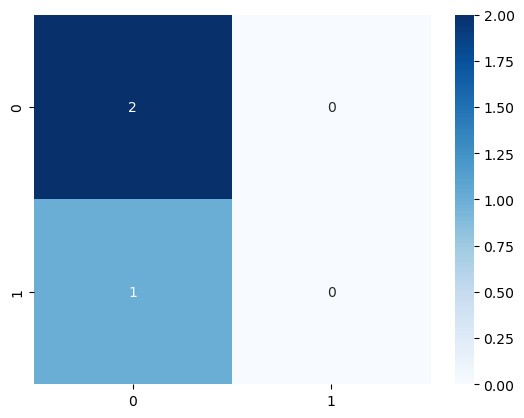

In [35]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Load the dataset
file_path = 'heart_disease.xlsx'
data = pd.read_excel(file_path)

# Step 1: Check the structure of the dataset
print("First few rows of the dataset:")
print(data.head())

# Step 2: List all columns
print("\nList of columns in the dataset:")
print(data.columns)

# Identify categorical columns (columns with object data type)
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical columns identified:", categorical_columns)

# Step 3: Convert categorical columns to numerical using one-hot encoding, if categorical columns exist
if len(categorical_columns) > 0:
    data = pd.get_dummies(data, columns=categorical_columns)

# Step 4: Convert all columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Handle missing values by forward filling
data = data.ffill()

# Step 5: Check unique values in each column to identify potential target columns
print("\nNumber of unique values in each column:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

# Step 6: Find columns with few unique values (2 or 3), as potential target columns
potential_target_cols = [col for col in data.columns if data[col].nunique() <= 3]
print("\nPotential target columns (with <= 3 unique values):")
print(potential_target_cols)

# Step 7: Assuming the first column with 2 or 3 unique values is the target column
if len(potential_target_cols) > 0:
    target_column = potential_target_cols[0]
    print(f"\nUsing '{target_column}' as the target column.")
else:
    raise ValueError("No suitable target column found.")

# -------------------------------------------
# Model Building and Evaluation
# -------------------------------------------
# Split the features and target
X = data.drop(columns=target_column)
y = data[target_column]

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Check the number of classes in the model
n_classes = dt_classifier.n_classes_
print(f"Number of classes: {n_classes}")

# If there are 2 or more classes, calculate ROC-AUC, otherwise skip it
if n_classes > 1:
    y_prob = dt_classifier.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC: {roc_auc:.4f}")
else:
    print("Skipping ROC-AUC calculation because only one class is predicted.")

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the evaluation metrics
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()


## Interview Questions and Answers

## Question 1: What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Hyperparameters are parameters that are set before training a machine learning model. In decision tree models, these parameters influence the structure and complexity of the tree, ultimately affecting its performance.

Here are some common hyperparameters and their effects:

Maximum Depth:

Controls the depth of the tree.
Deeper trees can capture more complex patterns but risk overfitting (learning noise in the data).
Shallower trees are less prone to overfitting but might underfit (fail to capture important patterns).
Minimum Samples Split:

Specifies the minimum number of samples required to split an internal node.
Smaller values can lead to overfitting, while larger values might result in underfitting.
Minimum Samples Leaf:

Sets the minimum number of samples in a leaf node.
Smaller values can lead to overfitting, while larger values might result in underfitting.
Criterion:

Determines the function used to measure the quality of a split.
Common criteria include Gini impurity and entropy.
Random State:

Controls the randomness in the algorithm, ensuring reproducibility.


## Question 2: What is the difference between Label encoding and One-hot encoding?
Label encoding and one-hot encoding are techniques used to convert categorical data into a numerical format that can be understood by machine learning algorithms.   

Label encoding:

Assigns a unique numerical value to each category.
Preserves the ordinal relationship between categories (if applicable).
Can be used for ordinal or nominal data.
Might introduce an artificial order if the categories are not ordinal.
One-hot encoding:

Creates a new binary feature for each category.
Sets the value to 1 for the corresponding category and 0 for others.
Does not preserve any ordinal relationship.
Suitable for nominal data.
Can increase the dimensionality of the data, especially with many categories.
When to use which:

Label encoding: Use when the categories have a natural order (e.g., "low", "medium", "high").
One-hot encoding: Use when the categories are mutually exclusive and have no inherent order (e.g., "red", "green", "blue").
Example:
If you have a categorical feature "color" with values "red", "green", and "blue":

Label encoding: might assign values 0, 1, and 2.
One-hot encoding: would create three new features: "color_red", "color_green", and "color_blue".